## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman1Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 1


## Dataset 


In [5]:
#Parameters 
n_features = 5
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman1Dataset.friedman1_data(n_samples,n_features)

         X0        X1        X2        X3        X4         Y
0 -0.382284  0.307951  1.015929 -1.650846 -1.378003 -1.088579
1  0.872365  0.014587  1.669124  1.574823  0.378737  2.465197
2  0.871667 -0.963238  0.685700 -0.103762  1.133662 -0.021889
3  1.294390 -0.949178  1.480521  0.649652  0.177284  0.879437
4 -1.780708  0.437007 -0.207307 -1.136694  1.741089 -1.564183


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 1.0024015	total: 57.9ms	remaining: 57.8s
1:	learn: 0.9915123	total: 58.5ms	remaining: 29.2s
2:	learn: 0.9817967	total: 59.1ms	remaining: 19.6s
3:	learn: 0.9715994	total: 59.7ms	remaining: 14.9s
4:	learn: 0.9611233	total: 60.2ms	remaining: 12s
5:	learn: 0.9517789	total: 60.7ms	remaining: 10.1s
6:	learn: 0.9408558	total: 61.2ms	remaining: 8.69s
7:	learn: 0.9326035	total: 61.7ms	remaining: 7.66s
8:	learn: 0.9237281	total: 62.3ms	remaining: 6.86s
9:	learn: 0.9157153	total: 62.8ms	remaining: 6.22s
10:	learn: 0.9070343	total: 63.4ms	remaining: 5.7s
11:	learn: 0.8976819	total: 64.1ms	remaining: 5.27s
12:	learn: 0.8893107	total: 64.5ms	remaining: 4.89s
13:	learn: 0.8811008	total: 64.8ms	remaining: 4.57s
14:	learn: 0.8744449	total: 65.3ms	remaining: 4.29s
15:	learn: 0.8663196	total: 65.7ms	remaining: 4.04s
16:	learn: 0.8584560	total: 66.2ms	remaining: 3.83s
17:	learn: 0.8512915	total: 66.7ms	remaining: 3.64s
18:	learn: 0.8441651	total: 67.1ms	remaining: 3

113:	learn: 0.3779241	total: 110ms	remaining: 853ms
114:	learn: 0.3745365	total: 110ms	remaining: 848ms
115:	learn: 0.3715017	total: 111ms	remaining: 844ms
116:	learn: 0.3684296	total: 111ms	remaining: 840ms
117:	learn: 0.3655462	total: 112ms	remaining: 835ms
118:	learn: 0.3629011	total: 112ms	remaining: 830ms
119:	learn: 0.3604807	total: 113ms	remaining: 825ms
120:	learn: 0.3577227	total: 113ms	remaining: 822ms
121:	learn: 0.3547533	total: 114ms	remaining: 817ms
122:	learn: 0.3516974	total: 114ms	remaining: 813ms
123:	learn: 0.3487376	total: 114ms	remaining: 808ms
124:	learn: 0.3458992	total: 115ms	remaining: 803ms
125:	learn: 0.3434441	total: 115ms	remaining: 799ms
126:	learn: 0.3408980	total: 116ms	remaining: 794ms
127:	learn: 0.3381175	total: 116ms	remaining: 791ms
128:	learn: 0.3352902	total: 117ms	remaining: 787ms
129:	learn: 0.3326399	total: 117ms	remaining: 783ms
130:	learn: 0.3298522	total: 118ms	remaining: 780ms
131:	learn: 0.3275553	total: 118ms	remaining: 777ms
132:	learn: 

274:	learn: 0.1170374	total: 187ms	remaining: 493ms
275:	learn: 0.1163794	total: 188ms	remaining: 492ms
276:	learn: 0.1157347	total: 188ms	remaining: 491ms
277:	learn: 0.1149406	total: 189ms	remaining: 490ms
278:	learn: 0.1141607	total: 189ms	remaining: 489ms
279:	learn: 0.1134598	total: 190ms	remaining: 488ms
280:	learn: 0.1126531	total: 191ms	remaining: 488ms
281:	learn: 0.1118964	total: 191ms	remaining: 487ms
282:	learn: 0.1112449	total: 192ms	remaining: 487ms
283:	learn: 0.1106301	total: 193ms	remaining: 486ms
284:	learn: 0.1099593	total: 193ms	remaining: 484ms
285:	learn: 0.1091050	total: 193ms	remaining: 483ms
286:	learn: 0.1084028	total: 194ms	remaining: 482ms
287:	learn: 0.1077889	total: 194ms	remaining: 480ms
288:	learn: 0.1071007	total: 195ms	remaining: 479ms
289:	learn: 0.1064887	total: 195ms	remaining: 478ms
290:	learn: 0.1058634	total: 196ms	remaining: 477ms
291:	learn: 0.1051870	total: 196ms	remaining: 475ms
292:	learn: 0.1044952	total: 196ms	remaining: 474ms
293:	learn: 

484:	learn: 0.0425914	total: 293ms	remaining: 312ms
485:	learn: 0.0425079	total: 294ms	remaining: 311ms
486:	learn: 0.0424344	total: 294ms	remaining: 310ms
487:	learn: 0.0421979	total: 295ms	remaining: 309ms
488:	learn: 0.0420522	total: 295ms	remaining: 309ms
489:	learn: 0.0419804	total: 296ms	remaining: 308ms
490:	learn: 0.0418138	total: 296ms	remaining: 307ms
491:	learn: 0.0417454	total: 297ms	remaining: 307ms
492:	learn: 0.0416779	total: 298ms	remaining: 306ms
493:	learn: 0.0414817	total: 298ms	remaining: 305ms
494:	learn: 0.0411761	total: 299ms	remaining: 305ms
495:	learn: 0.0410164	total: 299ms	remaining: 304ms
496:	learn: 0.0408795	total: 300ms	remaining: 303ms
497:	learn: 0.0408116	total: 300ms	remaining: 302ms
498:	learn: 0.0407443	total: 300ms	remaining: 302ms
499:	learn: 0.0405908	total: 301ms	remaining: 301ms
500:	learn: 0.0405245	total: 301ms	remaining: 300ms
501:	learn: 0.0403311	total: 302ms	remaining: 299ms
502:	learn: 0.0402660	total: 302ms	remaining: 299ms
503:	learn: 

637:	learn: 0.0220631	total: 370ms	remaining: 210ms
638:	learn: 0.0220354	total: 370ms	remaining: 209ms
639:	learn: 0.0218891	total: 371ms	remaining: 209ms
640:	learn: 0.0217743	total: 372ms	remaining: 208ms
641:	learn: 0.0216604	total: 372ms	remaining: 208ms
642:	learn: 0.0215105	total: 373ms	remaining: 207ms
643:	learn: 0.0214837	total: 373ms	remaining: 206ms
644:	learn: 0.0214573	total: 374ms	remaining: 206ms
645:	learn: 0.0213104	total: 374ms	remaining: 205ms
646:	learn: 0.0212808	total: 375ms	remaining: 204ms
647:	learn: 0.0211554	total: 375ms	remaining: 204ms
648:	learn: 0.0210259	total: 376ms	remaining: 203ms
649:	learn: 0.0209171	total: 376ms	remaining: 202ms
650:	learn: 0.0207756	total: 376ms	remaining: 202ms
651:	learn: 0.0207503	total: 377ms	remaining: 201ms
652:	learn: 0.0206902	total: 377ms	remaining: 201ms
653:	learn: 0.0206619	total: 378ms	remaining: 200ms
654:	learn: 0.0205237	total: 378ms	remaining: 199ms
655:	learn: 0.0204990	total: 379ms	remaining: 199ms
656:	learn: 

865:	learn: 0.0089434	total: 476ms	remaining: 73.6ms
866:	learn: 0.0089288	total: 476ms	remaining: 73.1ms
867:	learn: 0.0088866	total: 477ms	remaining: 72.5ms
868:	learn: 0.0088432	total: 477ms	remaining: 71.9ms
869:	learn: 0.0088022	total: 478ms	remaining: 71.4ms
870:	learn: 0.0087875	total: 478ms	remaining: 70.8ms
871:	learn: 0.0087464	total: 479ms	remaining: 70.3ms
872:	learn: 0.0087055	total: 479ms	remaining: 69.7ms
873:	learn: 0.0086652	total: 479ms	remaining: 69.1ms
874:	learn: 0.0086293	total: 480ms	remaining: 68.6ms
875:	learn: 0.0086150	total: 480ms	remaining: 68ms
876:	learn: 0.0086004	total: 481ms	remaining: 67.4ms
877:	learn: 0.0085604	total: 481ms	remaining: 66.9ms
878:	learn: 0.0085216	total: 482ms	remaining: 66.3ms
879:	learn: 0.0085078	total: 482ms	remaining: 65.7ms
880:	learn: 0.0084685	total: 483ms	remaining: 65.2ms
881:	learn: 0.0084315	total: 483ms	remaining: 64.6ms
882:	learn: 0.0083952	total: 483ms	remaining: 64ms
883:	learn: 0.0083568	total: 484ms	remaining: 63.5

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

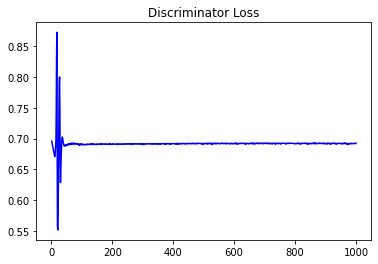

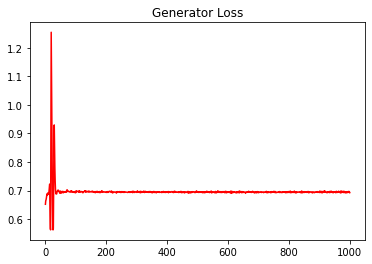

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.13048814901172537


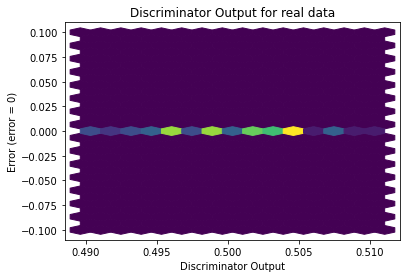

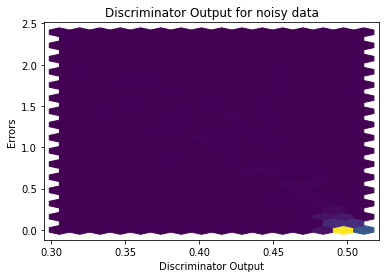

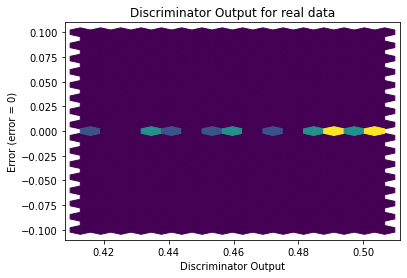

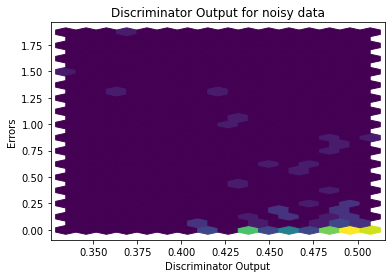

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


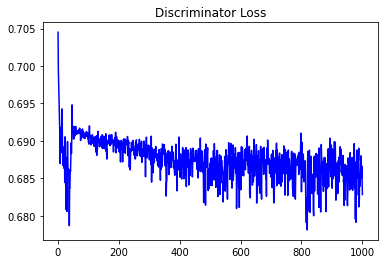

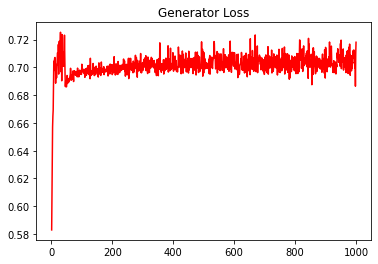

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.13180659381184237


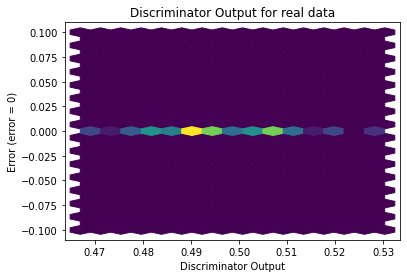

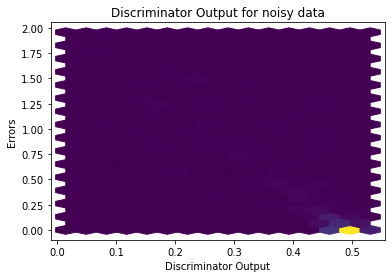

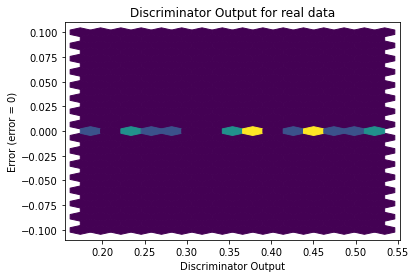

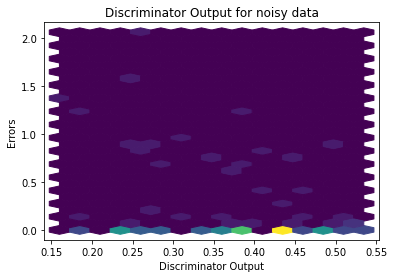

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.1707]], requires_grad=True)
